In [7]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {'winStride': (8, 8), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold': 0}

HOGDescriptor
- setSVMDetector : SVM 검출기를 이용해서 뭔가를 검출
- HOGDescriptor_getDefaultPeopleDetector : 사람을 검출

HyperParameter
- winStride : 
    - 이동 크기 ex) (8, 8) -> 가로 또는 세로로 8픽셀씩 이동
    - 작은 값으로 설정하면 검출을 잘 할 수 있지만 속도가 느려짐
    - 큰 값으로 설정하면 속도는 빠르지만 검출은 잘 안될 수 있음
- padding : 
    - 0값으로 채워진 칸을 가로 세로 32픽셀씩 추가해 늘림
    - 패딩을 추가하면 이미지 가장자리에 있는 검출대상을 찾을 수 있음
- scale : 
    - 스케일 팩터 = 이미지를 팩터만큼 줄인다
    - 많이 줄이면 작은 검출 대상도 검출할 수 있음, 하지만 속도가 느려짐
    - 늘리면 속도는 빨라지지만 작은 검출 대상은 검출할 수 없음
- hitThreshold : 
    - 신뢰도 임계값, 0은 기본 임계값 사용
    - 양수면 더 높은 신뢰도를 요구함
    - 음수면 더 많은 검출 대상을 검출하는데 오류가 발생할 확률이 높음

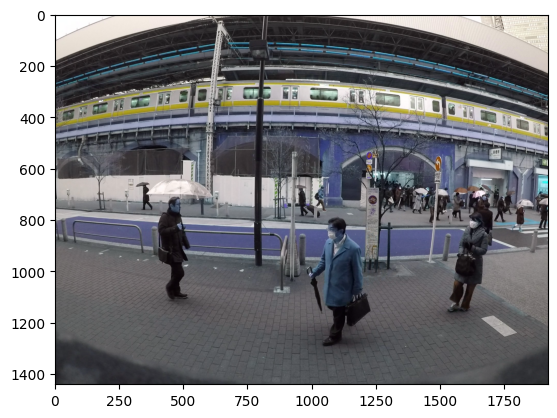

In [8]:
import matplotlib.pyplot as plt

img_path = 'img/img01.jpg'
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

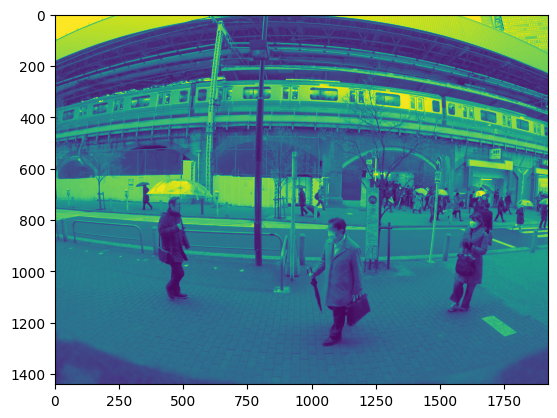

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

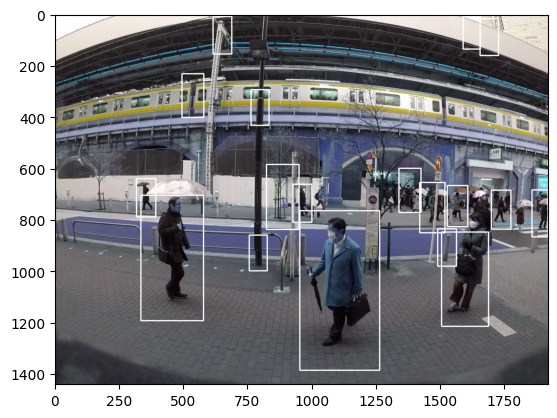

In [10]:
human, r = hog.detectMultiScale(gray, **hogParams)
img0 = img.copy()
if (len(human) > 0):
    for (x, y, w, h) in human:
        cv2.rectangle(img0, (x, y), (x + w, y + h), (255, 255, 255), 3)
        
plt.imshow(img0)
plt.show()

In [11]:
def detect_human(img, hogParams):
    img0 = img.copy()
    human, r = hog.detectMultiScale(gray, **hogParams)
    if (len(human) > 0):
        for (x, y, w, h) in human:
            cv2.rectangle(img0, (x, y), (x + w, y + h), (255, 255, 255), 3)
    plt.imshow(img0)
    plt.show()

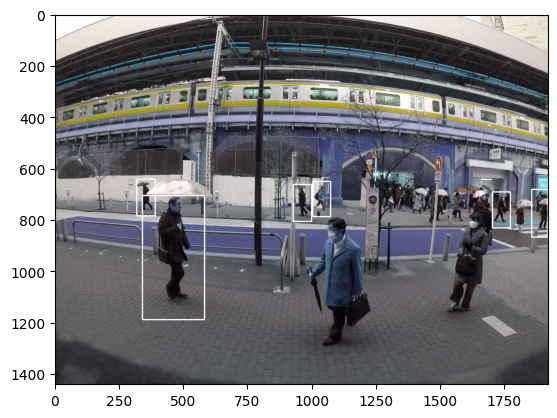

In [15]:
hogParams = {'winStride': (4, 4), 'padding': (32, 32), 'scale': 1.05, 'hitThreshold': 1}
detect_human(img, hogParams)